In [25]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis, jarque_bera
from statsmodels.tsa.stattools import adfuller

from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Data Description

In [26]:
df_nasdaq = pd.read_csv('df_nasdaq.csv')
df_sp500 = pd.read_csv('df_sp500.csv')
df_dji = pd.read_csv('df_dji.csv')

df_close = pd.DataFrame({
    'Date': df_nasdaq['Date'],
    'nasdaq': df_nasdaq['Close'],
    'sp500': df_sp500['Close'],
    'dji': df_dji['Close']
})

df_close['Date'] = pd.to_datetime(df_close['Date'])
df_close.set_index('Date', inplace=True)
print(df_close.head())

                 nasdaq        sp500           dji
Date                                              
2019-03-14  7630.910156  2808.479980  25709.939453
2019-03-15  7688.529785  2822.479980  25848.869141
2019-03-18  7714.479980  2832.939941  25914.099609
2019-03-19  7723.950195  2832.570068  25887.380859
2019-03-20  7728.970215  2824.229980  25745.669922


In [27]:
def compute_statistics_with_adf(df):
    stats = pd.DataFrame()
    stats['Mean'] = df.mean()
    stats['St.Dev'] = df.std(ddof=1)
    stats['Max'] = df.max()
    stats['Min'] = df.min()
    stats['Skewness'] = df.apply(skew)
    stats['Kurtosis'] = df.apply(kurtosis)
    jb_p_values = df.apply(lambda x: jarque_bera(x)[1])
    adf_p_values = df.apply(lambda x: adfuller(x)[1])
    stats['p_value_JBtest'] = jb_p_values
    stats['p_value_ADFtest'] = adf_p_values
    return stats

# Compute statistics with ADF test
stats_df_close_with_adf = compute_statistics_with_adf(df_close).round(2)

In [28]:
stats_df_close_with_adf

,Mean,St.Dev,Max,Min,Skewness,Kurtosis,p_value_JBtest,p_value_ADFtest
nasdaq,12282.68,2760.16,18647.45,6860.67,-0.08,-0.86,0.0,0.81
sp500,3966.52,736.53,5667.20,2237.40,0.05,-0.71,0.0,0.89
dji,32035.14,4377.36,41198.08,18591.93,-0.23,-0.64,0.0,0.73


## Comparison of Model Predictions

In [29]:
prediction_nasdaq_lstm = pd.read_csv('lstm/nasdaq_lstm_predictions.csv')
prediction_nasdaq_bi_lstm = pd.read_csv('bi-lstm/nasdaq_bi-lstm_predictions.csv')
prediction_nasdaq_cnn_lstm = pd.read_csv('cnn-lstm/nasdaq_cnn-lstm_predictions.csv')
prediction_nasdaq_gru = pd.read_csv('gru/nasdaq_gru_predictions.csv')
prediction_nasdaq_sru = pd.read_csv('sru/nasdaq_sru_predictions.csv')

prediction_sp500_lstm = pd.read_csv('lstm/sp500_lstm_predictions.csv')
prediction_sp500_bi_lstm = pd.read_csv('bi-lstm/sp500_bi-lstm_predictions.csv')
prediction_sp500_cnn_lstm = pd.read_csv('cnn-lstm/sp500_cnn-lstm_predictions.csv')
prediction_sp500_gru = pd.read_csv('gru/sp500_gru_predictions.csv')
prediction_sp500_sru = pd.read_csv('sru/sp500_sru_predictions.csv')

prediction_dji_lstm = pd.read_csv('lstm/dji_lstm_predictions.csv')
prediction_dji_bi_lstm = pd.read_csv('bi-lstm/dji_bi-lstm_predictions.csv')
prediction_dji_cnn_lstm = pd.read_csv('cnn-lstm/dji_cnn-lstm_predictions.csv')
prediction_dji_gru = pd.read_csv('gru/dji_gru_predictions.csv')
prediction_dji_sru = pd.read_csv('sru/dji_sru_predictions.csv')

prediction_arima = pd.read_csv('arima_predictions.csv')
prediction_arima = prediction_arima.iloc[-244:].reset_index(drop=True)

In [30]:
df_nasdaq_prediction = pd.DataFrame({
    'test': prediction_nasdaq_lstm.iloc[:, 0],  
    'lstm': prediction_nasdaq_lstm.iloc[:, 1],  
    'bi_lstm': prediction_nasdaq_bi_lstm.iloc[:, 1],  
    'cnn_lstm': prediction_nasdaq_cnn_lstm.iloc[:, 1],  
    'gru': prediction_nasdaq_gru.iloc[:, 1], 
    'sru': prediction_nasdaq_sru.iloc[:, 1],
    'arima': prediction_arima['nasdaq']
})

df_sp500_prediction = pd.DataFrame({
    'test': prediction_sp500_lstm.iloc[:, 0],  
    'lstm': prediction_sp500_lstm.iloc[:, 1],  
    'bi_lstm': prediction_sp500_bi_lstm.iloc[:, 1],  
    'cnn_lstm': prediction_sp500_cnn_lstm.iloc[:, 1],  
    'gru': prediction_sp500_gru.iloc[:, 1], 
    'sru': prediction_sp500_sru.iloc[:, 1],
    'arima': prediction_arima['sp500']
})

df_dji_prediction = pd.DataFrame({
    'test': prediction_dji_lstm.iloc[:, 0],  
    'lstm': prediction_dji_lstm.iloc[:, 1],  
    'bi_lstm': prediction_dji_bi_lstm.iloc[:, 1],  
    'cnn_lstm': prediction_dji_cnn_lstm.iloc[:, 1],  
    'gru': prediction_dji_gru.iloc[:, 1], 
    'sru': prediction_dji_sru.iloc[:, 1],
    'arima': prediction_arima['dji']
})


print(df_nasdaq_prediction.head())
print(df_sp500_prediction.head())
print(df_dji_prediction.head())

           test       lstm    bi_lstm    cnn_lstm        gru        sru  \
0  13872.469727  13892.125  14199.572  14350.6760  13937.266  13883.093   
1  13748.830078  13758.415  14153.306  14348.1560  13795.055  13751.320   
2  13761.530273  13646.591  14053.540  14246.2295  13653.821  13640.914   
3  13917.889648  13676.967  13999.802  14134.6810  13713.321  13669.799   
4  13773.610352  13785.429  14014.383  14139.0820  13847.834  13774.181   

          arima  
0  13564.902781  
1  13550.534842  
2  13536.182121  
3  13521.844603  
4  13507.522271  
          test       lstm    bi_lstm   cnn_lstm        gru        sru  \
0  4465.479980  4478.3154  4540.8564  4508.9595  4507.6460  4474.2393   
1  4451.140137  4442.4170  4524.0684  4512.1797  4479.5933  4442.1484   
2  4457.490234  4433.5880  4507.4120  4504.6200  4462.8280  4433.2524   
3  4487.459961  4438.8790  4500.6200  4493.5073  4471.4000  4438.3790   
4  4461.899902  4463.4230  4505.9790  4493.7373  4489.7640  4457.1300   

  

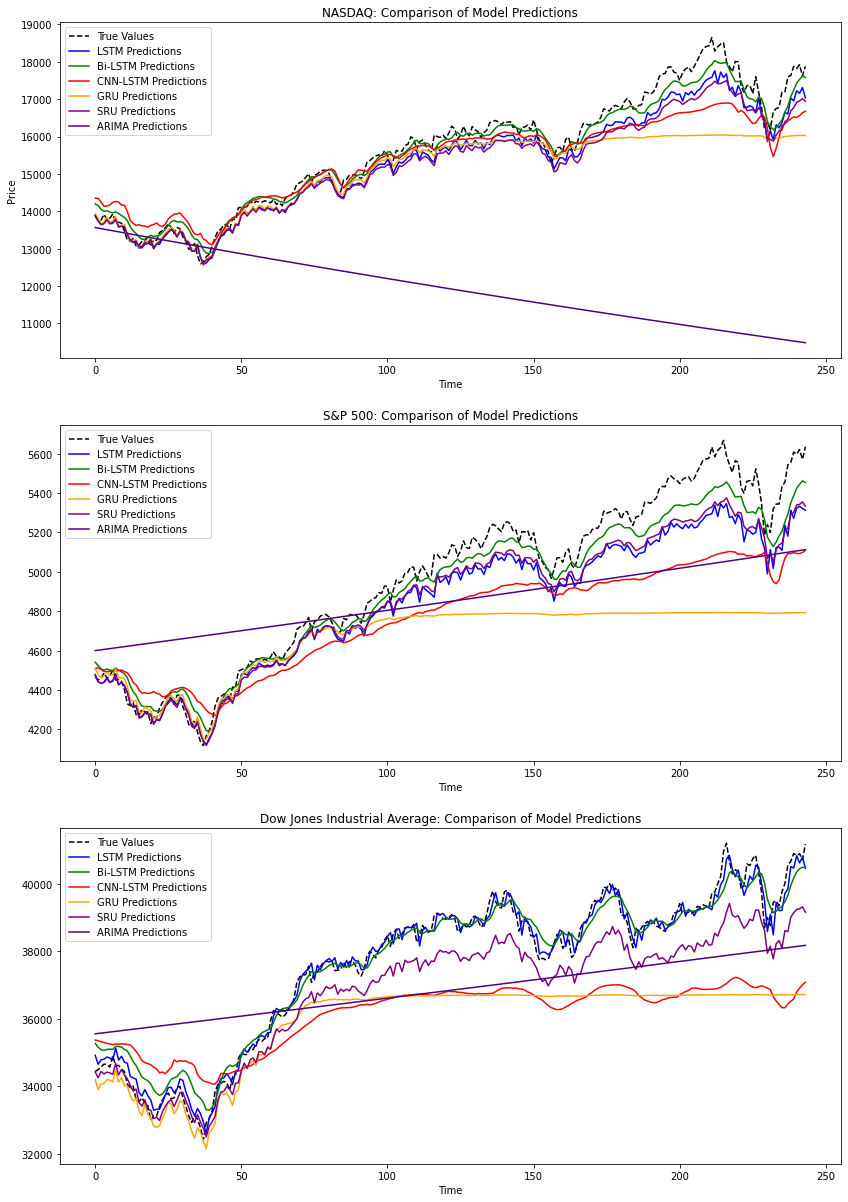

In [31]:
dfs = {'NASDAQ': df_nasdaq_prediction, 'S&P 500': df_sp500_prediction, 'Dow Jones Industrial Average': df_dji_prediction}

fig, axs = plt.subplots(3, 1, figsize=(14, 21))

for i, (title, df) in enumerate(dfs.items()):
    axs[i].plot(df['test'], label='True Values', color='black', linestyle='--')
    axs[i].plot(df['lstm'], label='LSTM Predictions', color='blue')
    axs[i].plot(df['bi_lstm'], label='Bi-LSTM Predictions', color='green')
    axs[i].plot(df['cnn_lstm'], label='CNN-LSTM Predictions', color='red')
    axs[i].plot(df['gru'], label='GRU Predictions', color='orange')
    axs[i].plot(df['sru'], label='SRU Predictions', color='purple')
    axs[i].plot(df['arima'], label='ARIMA Predictions', color='indigo')
    axs[i].set_title(f'{title}: Comparison of Model Predictions')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Price')
    axs[i].legend()

    # Set y-label for the last two subplots
    if i == 1 or i == 2:
        axs[i].set_ylabel('')

plt.savefig('graph/model_predictions_comparison_all.jpg', format='jpg', dpi=300)
plt.show()

## Comparison of Error Metrics

In [32]:
model_name = ['lstm', 'bi_lstm', 'cnn_lstm', 'gru', 'sru', 'arima']

mse_nasdaq = []
for model in model_name: 
    mse_nasdaq.append(mean_squared_error(df_nasdaq_prediction['test'], df_nasdaq_prediction[model]))
    
mse_sp500 = []
for model in model_name: 
    mse_sp500.append(mean_squared_error(df_sp500_prediction['test'], df_sp500_prediction[model]))
    
mse_dji = []
for model in model_name: 
    mse_dji.append(mean_squared_error(df_dji_prediction['test'], df_dji_prediction[model]))

df_mse = pd.DataFrame({'nasdaq': mse_nasdaq, 'sp500': mse_sp500, 'dji': mse_dji}, index=model_name).round(2)

In [33]:
df_mse

,nasdaq,sp500,dji
lstm,178575.89,23852.40,76137.91
bi_lstm,78358.53,9003.95,185081.10
cnn_lstm,380009.55,72088.93,4205832.24
gru,740105.25,159212.88,4165061.04
sru,272109.91,19130.61,900839.78
arima,19161061.02,91402.94,3215718.02


In [34]:
mean_squared_error(df_dji_prediction['test'], df_dji_prediction['sru'])

900839.7758118993

## Comparison of training history

In [35]:
file_paths_nasdaq = {
    'LSTM': 'lstm/nasdaq_lstm_training_history.pkl',
    'Bi-LSTM': 'bi-lstm/nasdaq_bi-lstm_training_history.pkl',
    'CNN-LSTM': 'cnn-lstm/nasdaq_cnn-lstm_training_history.pkl',
    'GRU': 'gru/nasdaq_gru_training_history.pkl', 
    'SRU': 'sru/nasdaq_sru_training_history.pkl', 
}
history_dicts_nasdaq = {}
for name, path in file_paths_nasdaq.items():
    with open(path, 'rb') as file:
        history_dicts_nasdaq[name] = pickle.load(file)

file_paths_sp500 = {
    'LSTM': 'lstm/sp500_lstm_training_history.pkl',
    'Bi-LSTM': 'bi-lstm/sp500_bi-lstm_training_history.pkl',
    'CNN-LSTM': 'cnn-lstm/sp500_cnn-lstm_training_history.pkl',
    'GRU': 'gru/sp500_gru_training_history.pkl', 
    'SRU': 'sru/sp500_sru_training_history.pkl', 
}
history_dicts_sp500 = {}
for name, path in file_paths_sp500.items():
    with open(path, 'rb') as file:
        history_dicts_sp500[name] = pickle.load(file)

file_paths_dji = {
    'LSTM': 'lstm/dji_lstm_training_history.pkl',
    'Bi-LSTM': 'bi-lstm/dji_bi-lstm_training_history.pkl',
    'CNN-LSTM': 'cnn-lstm/dji_cnn-lstm_training_history.pkl',
    'GRU': 'gru/dji_gru_training_history.pkl', 
    'SRU': 'sru/dji_sru_training_history.pkl', 
}
history_dicts_dji = {}
for name, path in file_paths_dji.items():
    with open(path, 'rb') as file:
        history_dicts_dji[name] = pickle.load(file)

In [36]:
min_val_loss_epochs = {}

for dataset_name, history_dicts in zip(['nasdaq', 'sp500', 'dji'], [history_dicts_nasdaq, history_dicts_sp500, history_dicts_dji]):
    for model_name, history in history_dicts.items():
        val_loss = history['val_loss']
        min_val_loss_epoch = val_loss.index(min(val_loss)) + 1
        min_val_loss_epochs[model_name] = min_val_loss_epoch
    df = pd.DataFrame(min_val_loss_epochs, index=[dataset_name])
    if dataset_name == 'nasdaq':
        df_min_val_loss_epochs = df
    else:
        df_min_val_loss_epochs = pd.concat([df_min_val_loss_epochs, df], axis=0)

df_min_val_loss_epochs = df_min_val_loss_epochs[['LSTM', 'Bi-LSTM', 'CNN-LSTM', 'GRU', 'SRU']]
df_min_val_loss_epochs.columns.name = None
df_min_val_loss_epochs.index.name = None

print(df_min_val_loss_epochs)

        LSTM  Bi-LSTM  CNN-LSTM  GRU  SRU
nasdaq   327       74        37  279  372
sp500    410       34         4  271  334
dji      450       65         9  446   36


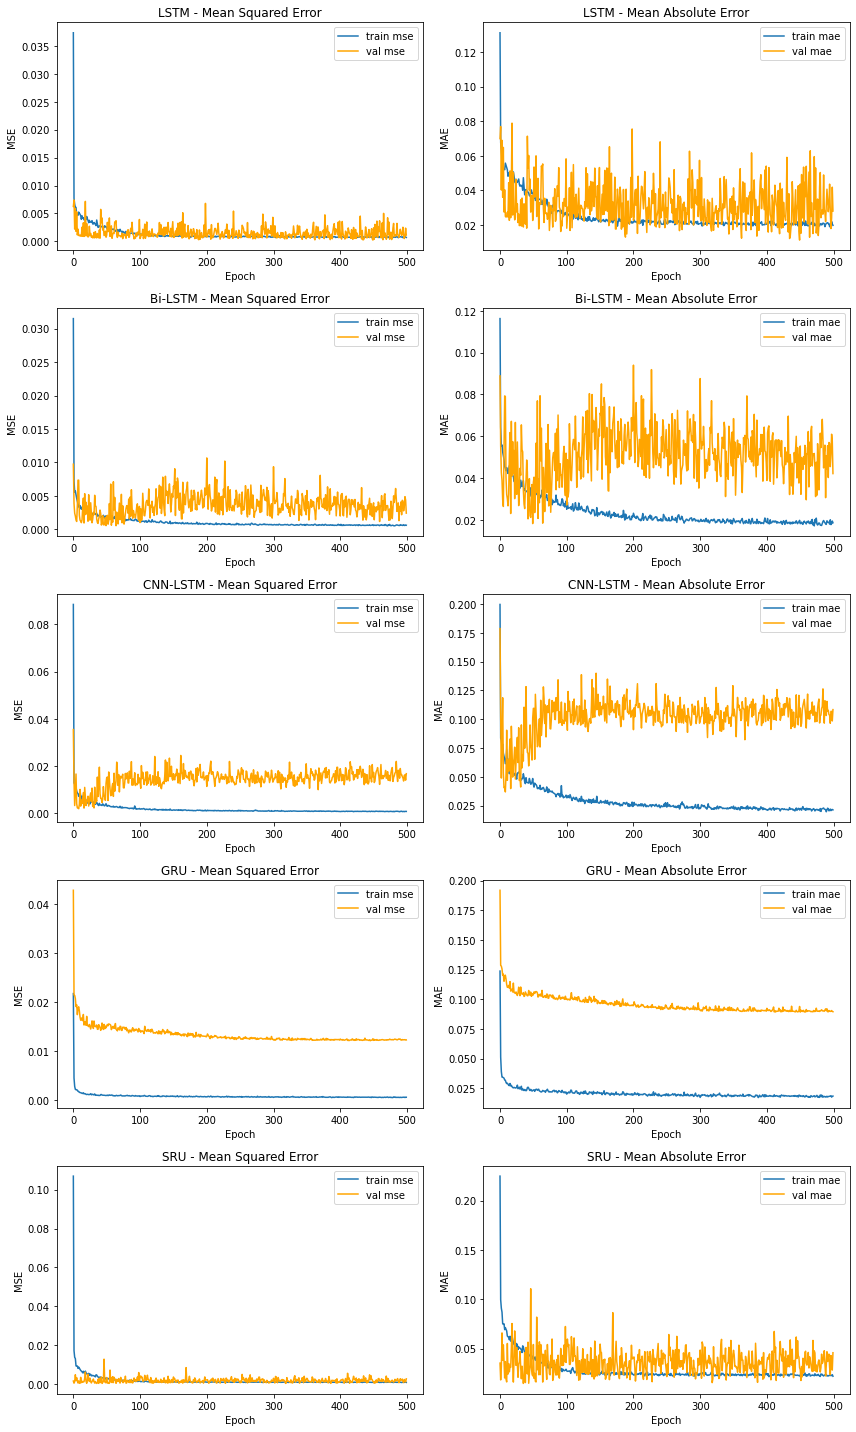

In [37]:
n_models = len(history_dicts)

# Create a figure with subplots, 2 plots per row
fig, axes = plt.subplots(n_models, 2, figsize=(12, 4 * n_models))

# Iterate over the history data for each model
for i, (model_name, history) in enumerate(history_dicts.items()):
    # Plot MSE
    axes[i, 0].plot(history['mse'], label='train mse')
    axes[i, 0].plot(history['val_mse'], label='val mse', color='orange')
    axes[i, 0].set_xlabel("Epoch")
    axes[i, 0].set_ylabel("MSE")
    axes[i, 0].set_title(f"{model_name} - Mean Squared Error")
    axes[i, 0].legend()

    # Plot MAE
    axes[i, 1].plot(history['mae'], label='train mae')
    axes[i, 1].plot(history['val_mae'], label='val mae', color='orange')
    axes[i, 1].set_xlabel("Epoch")
    axes[i, 1].set_ylabel("MAE")
    axes[i, 1].set_title(f"{model_name} - Mean Absolute Error")
    axes[i, 1].legend()


plt.tight_layout()
plt.savefig('graph/model_training_history_comparison_nasdaq.jpg', format='jpg', dpi=300)
plt.show()

In [38]:
'''
n_models = len(history_dicts_nasdaq)

# Create a figure with subplots, n_models plots per row and 3 columns
fig, axes = plt.subplots(n_models, 3, figsize=(12*3, 4 * n_models), sharex=True, sharey=True)

# Create a list of history dicts for each index
history_dicts_list = [history_dicts_nasdaq, history_dicts_sp500, history_dicts_dji]
index_names = ['NASDAQ', 'S&P 500', 'Dow Jones Industrial Average']

# Iterate over each index
for i, (index_name, history_dicts) in enumerate(zip(index_names, history_dicts_list)):
    # Iterate over the history data for each model
    for j, (model_name, history) in enumerate(history_dicts.items()):
        # Plot MSE
        axes[j, i].plot(history['mse'], label='train mse')
        axes[j, i].plot(history['val_mse'], label='val mse', color='orange')
        axes[j, i].set_xlabel("Epoch")
        axes[j, i].set_ylabel("MSE")
        axes[j, i].set_title(f"{model_name} - Mean Squared Error - {index_name}")
        axes[j, i].legend()

plt.tight_layout()
plt.savefig('model_training_history_comparison_all_indices.jpg', format='jpg', dpi=300)
plt.show()
'''

'\nn_models = len(history_dicts_nasdaq)\n\n# Create a figure with subplots, n_models plots per row and 3 columns\nfig, axes = plt.subplots(n_models, 3, figsize=(12*3, 4 * n_models), sharex=True, sharey=True)\n\n# Create a list of history dicts for each index\nhistory_dicts_list = [history_dicts_nasdaq, history_dicts_sp500, history_dicts_dji]\nindex_names = [\'NASDAQ\', \'S&P 500\', \'Dow Jones Industrial Average\']\n\n# Iterate over each index\nfor i, (index_name, history_dicts) in enumerate(zip(index_names, history_dicts_list)):\n    # Iterate over the history data for each model\n    for j, (model_name, history) in enumerate(history_dicts.items()):\n        # Plot MSE\n        axes[j, i].plot(history[\'mse\'], label=\'train mse\')\n        axes[j, i].plot(history[\'val_mse\'], label=\'val mse\', color=\'orange\')\n        axes[j, i].set_xlabel("Epoch")\n        axes[j, i].set_ylabel("MSE")\n        axes[j, i].set_title(f"{model_name} - Mean Squared Error - {index_name}")\n        axe